In [23]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Ensures that npyx will ACTUALLY be reimported in a running session
%reload_ext autoreload
%autoreload 2
from npyx import *
from dataloader import *

cupy could not be imported - some functions dealing with the binary file (filtering, whitening...) will not work.

npyx version 3.0.2 imported.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

#### Specify path to folder containing "\*.bin" and "\*.meta" files

Folder must also contain output files from Kilosort

In [22]:
BASE_PATH="./../" 

Create dataloader object

In [19]:
neuroObj=NeuroLoader(BASE_PATH)

Neuropixels probe 1.0 acquired with SpikeGLX.
Highpass filtered data at ./s1_1835_light_intermediate_g0_t0.imec0.ap.bin was acquired at 30000 Hz.


Load all,good units output from Kilosort

In [4]:
all_units = neuroObj.load_units()
good_units = neuroObj.load_units(quality="good")
print (f"total units in data: {len(all_units)}, of which good units identified: {len(good_units)}")

total units in data: 540, of which good units identified: 278


Get spikes from raw recordings for a good unit

In [5]:
u = good_units[1]
t_samples, t_sec = neuroObj.get_spike_times_for_unit(unit_id=u)

Neuron 1 has 6195 spikes across 4 sessions


Get waveforms from raw recordings for a good unit

In [6]:
waveforms,peak_channel = neuroObj.get_waveforms_for_unit( unit_id=u, t_waveforms=82) # t_waveforms: temporal span of waveforms | Default 82 (about 3ms)

waveform extracted is an array of shape 100 spikes by 82 samples (time) by 384 channels.
Peak channel for unit 1 is: 0
We define the peak channel as the channel with maximum amplitude


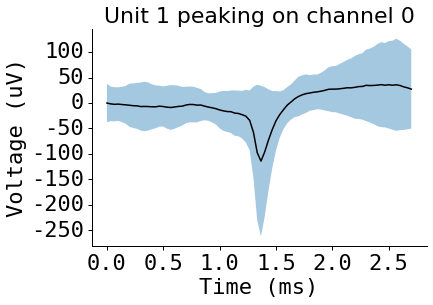

In [18]:
# Plot
spikes, samples, channels = waveforms.shape
w_time = np.arange(samples) * 1000 / neuroObj.fs
w = waveforms.mean(0)[:,peak_channel]
w_s = waveforms.std(0)[:,peak_channel]
plt.fill_between(w_time, w+w_s, w-w_s, alpha=0.4)
plt.plot(w_time, w, color="k")
fig = mplp(title = f"Unit {u} peaking on channel {peak_channel}", xlabel = "Time (ms)", ylabel = "Voltage (uV)")
plt.show()

Get a chunk of raw neuropixels recordings across specified time interval

In [20]:
times=[0, 0.07] #specify times in seconds
raw_data_chunk = neuroObj.extract_raw_recording_chunk(times, channels=np.arange(384))
channels, samples = raw_data_chunk.shape

extract_rawChunk() returns an array of shape 384 channels x 2100 samples (70ms)


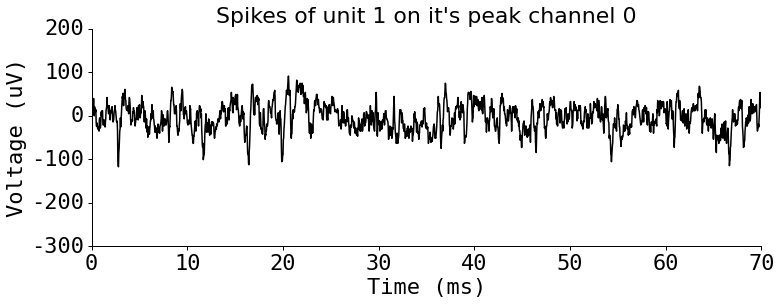

In [21]:
plt.plot(np.arange(samples)/30, raw_data_chunk[peak_channel], color='k')
plt.scatter(t_sec* 1000, t_sec * 0 - 250, color="red", marker="^", lw=3, s=20)
fig = mplp(figsize = (12,4), title = f"Spikes of unit {u} on it's peak channel {peak_channel}", xlim = [0, samples * 1000 / neuroObj.fs], ylim = [-300, 200],
           xlabel = "Time (ms)", ylabel = "Voltage (uV)")